<h1> SECTION 1 BUSINESS UNDERSTANDING </h1>

Ever since video streaming websites came out. Platforms have been pushing out more and more content to beat the other platforms. 
We will analyze Netflix’s TV Shows and Movies data to see exactly what popular content is on Netflix and how to make a successful show.

The dataset we will be using today is from Kaggle (https://www.kaggle.com/datasets/shivamb/netflix-show), 
 and for the first few steps, we had to clean the data to show data that we needed to help us answer

1) Are there more Movies or TV Shows
2) What is the most produced genre overall? In movies? In TV Shows
3) What is the most common rating? In movies? In TV shows?
4) Who are the top 15 directors

In [247]:
#Import required materials

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

<h1> SECTION 2 DATA UNDERSTANDING </h1>
       First we need to start of with importing the data set we want to use to take a look at the output.


In [248]:
#Load data set 
df=pd.read_csv(r"c:\Users\SHsieh\Desktop\DataSet\netflix_titles.csv")

In [249]:
#Print chart
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


After importing the selected data we realize that we don't need all the columns presented. So to make out data smaller we select specific data that we what to use and assign it to a variable named columns.

In [250]:
# Select data that will be used 
columns = ['type', 'title', 'country', 'listed_in', 'rating','cast']


<h1>SECTION 3 DATA UNDERSTANDING</h1>

In [263]:
def data(columnName):
    '''
    Defining data and assigning it a task
    Return a series counting the unique rows in data frame
    
    '''
    data = df[columnName].str.cat(sep = ',')
    data = pd.Series(data.split(','))
    count = data.value_counts(ascending = False)
    return count

<h2>Are there more Movies or TV Shows? </h2>
  There is a major difference between TV Shows and Movies and people prefer one over another. So to determine what is most sought after we can compare the amount of Movies there are to TV shows.


In [252]:
#Count of Movies and TV Shows
countType = data('type')
countType.head()


Movie      6131
TV Show    2676
dtype: int64

<AxesSubplot: xlabel='type', ylabel='count'>

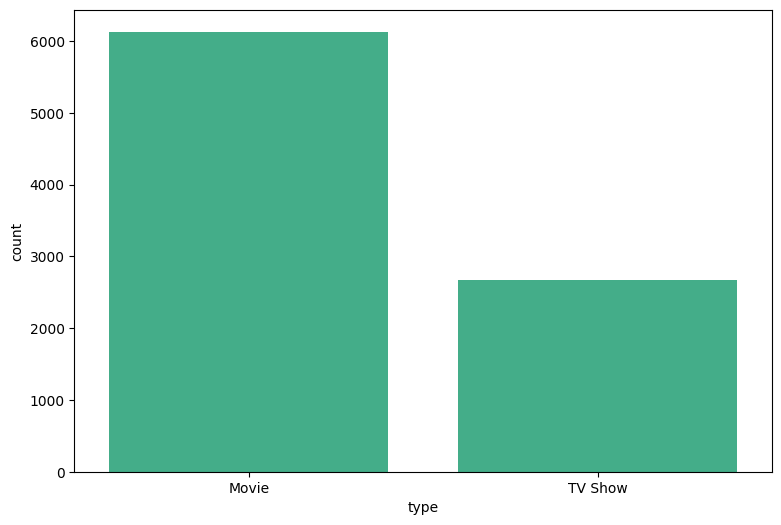

In [253]:
# Plot count of Movies and TV Show
plt.figure(figsize=(9,6))
sns.countplot(x='type', data=df, color = '#32bf8e' )


<blockquote> this is a visual chart to address the question wether there are more shows or movies on the platform to give a simple view to the answer.Here we can see that there are a lot more movies than there are of TV Shows.</blockquote>

<h3> What is the most produced genre overall? In movies? In TV Shows? </h3>

Here we want to see the mst produced genres for each category> To do this we are taking the data from the column listed in and counting the amount of times a genre appears in the list. 
To ensure it works we can have it provide us with a partial list listing the top 5 genre of movies.

In [254]:
countType = data('listed_in')
countType.head()

 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
dtype: int64

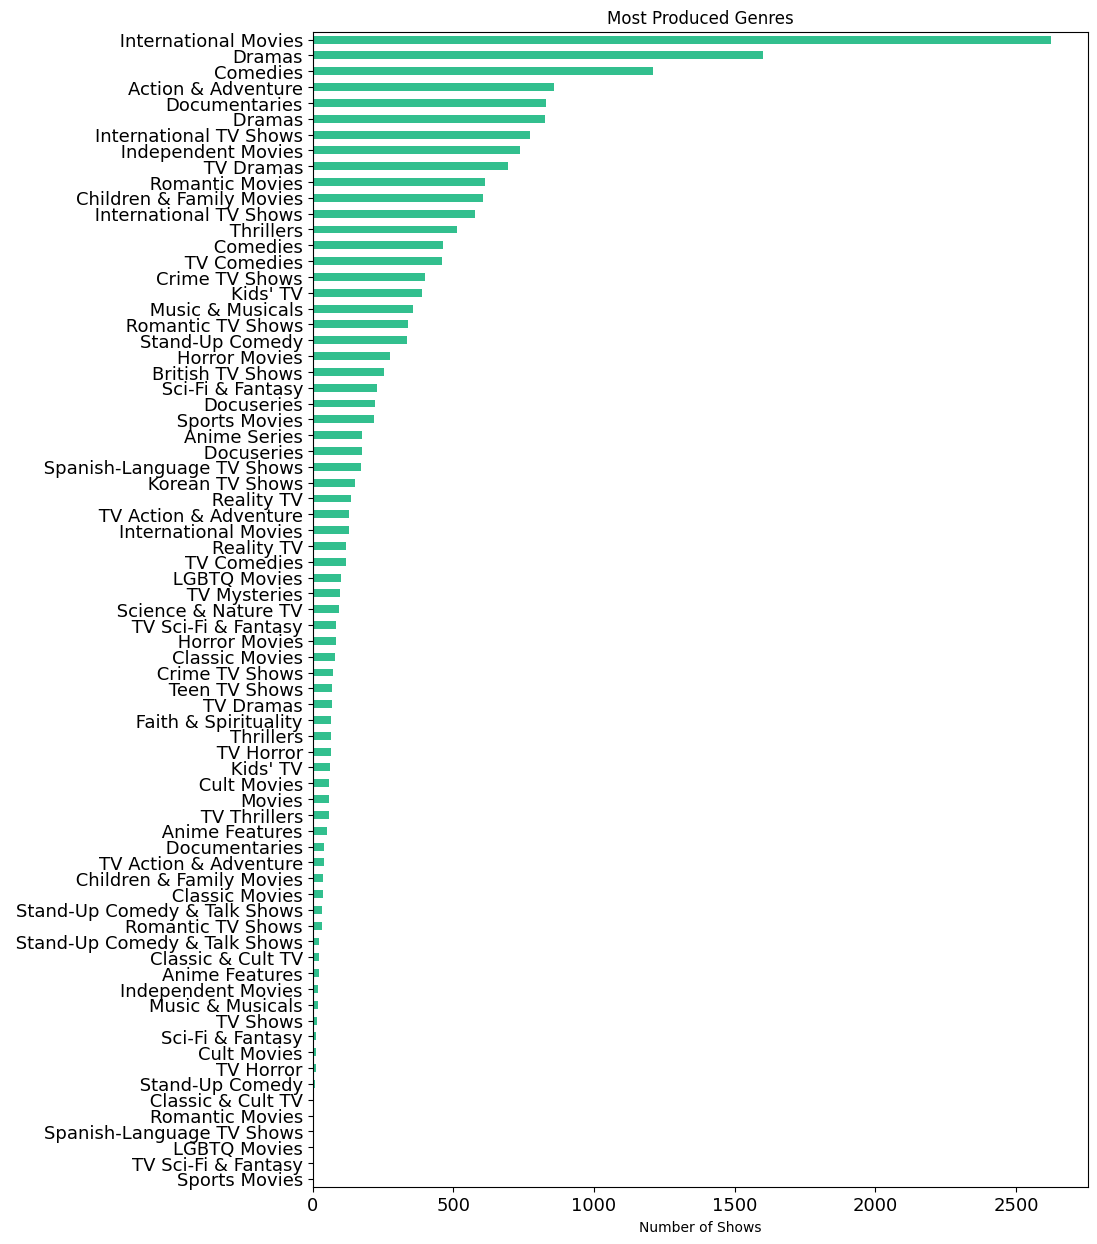

In [255]:
#Plotting in descending order
countType.sort_values(ascending = True, inplace = True)

# Chart Type 
lt = countType.plot.barh(color = '#32bf8e', fontsize = 13)

# Set title
lt.set(title = 'Most Produced Genres')

# X axis
lt.set_xlabel('Number of Shows', color = 'black', fontsize = '10')

# Visualization Size
lt.figure.set_size_inches(10, 15)

# Plotting Chart 
plt.show()



<blockquote>Here we can see all the genres that can be found and how many production each dramas has.  </blockquote>  

But notice how the TV Shows and Movies are combine together. We next need to separate the movies from the TV Shows.

<AxesSubplot: title={'center': 'Top 20 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

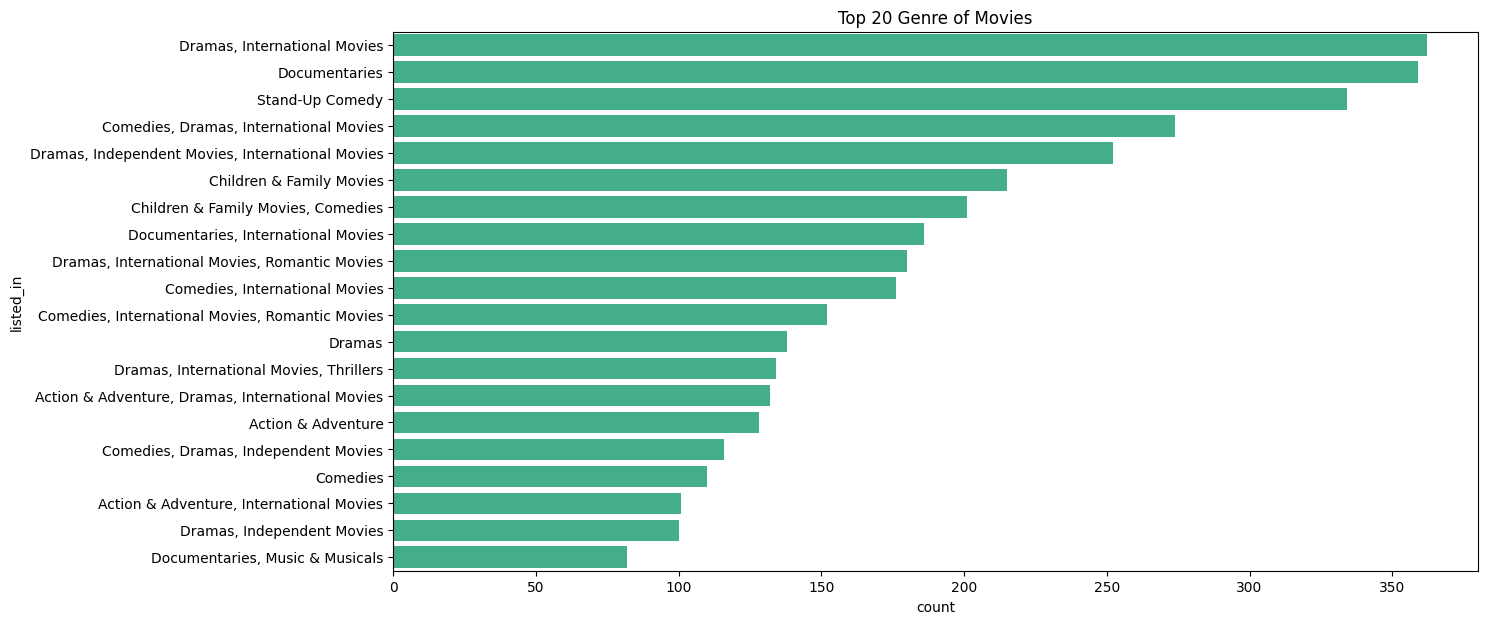

In [256]:
#Pull Movies
moviesType=df[df['type']=='Movie']

#Plotting movie information
plt.figure(figsize=(14,7))
plt.title('Top 20 Genre of Movies')
sns.countplot(y=moviesType['listed_in'],data=moviesType,order=moviesType['listed_in'].value_counts().index[0:20],color = '#32bf8e')



As you can see above, the chart comes from first pulling all the movies and assigning it into a variable where we then later plot it to show a visual representation of the top genres in regards to movies.
Below its basically the same setup but we pull TV Shows instead of movies and plot that information down there.

<AxesSubplot: title={'center': 'Top 20 TV Shows'}, xlabel='count', ylabel='listed_in'>

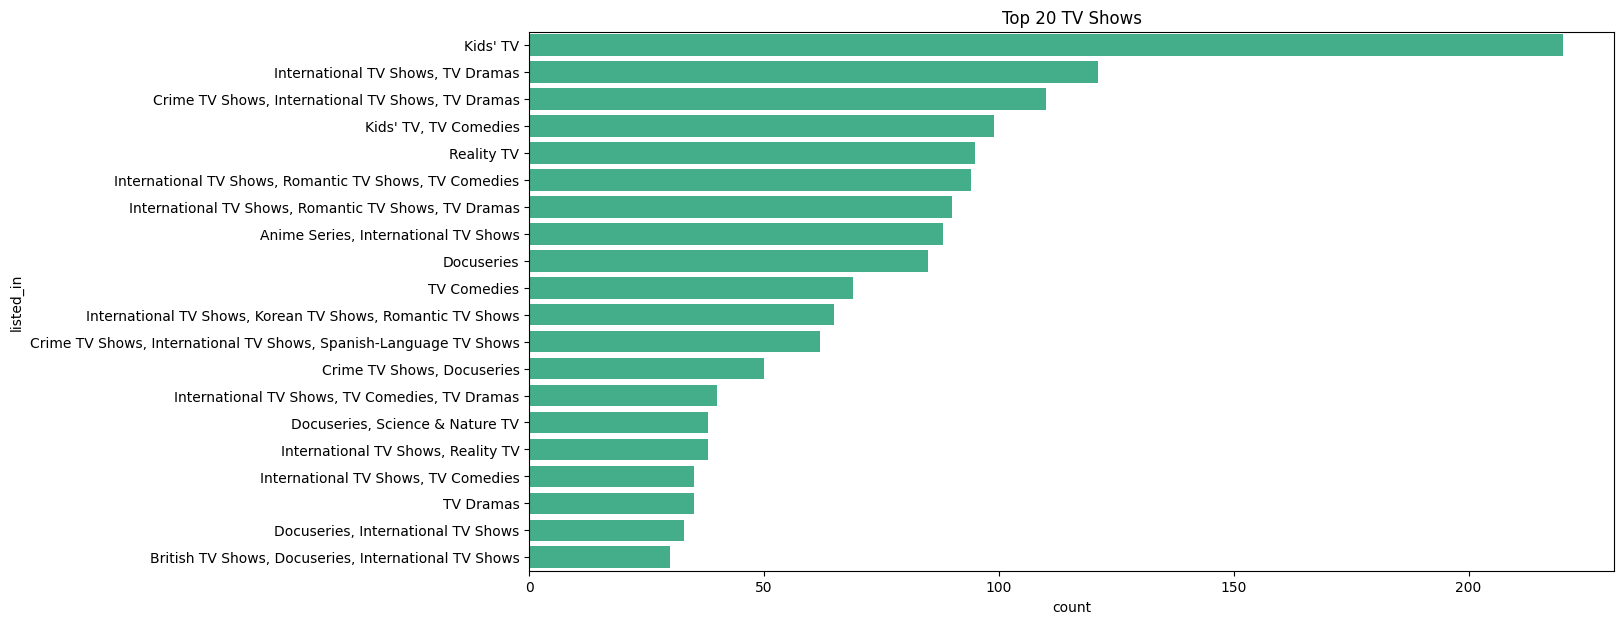

In [257]:
# Pulling TV Shows
TVShow=df[df['type']=='TV Show']


#Plotting TV Shows 
plt.figure(figsize=(14,7))
plt.title('Top 20 TV Shows')
sns.countplot(y=TVShow['listed_in'],data=TVShow,order=TVShow['listed_in'].value_counts().index[0:20],color = '#32bf8e')

<h2>3) What is the most common rating? In movies? In TV shows?</h2>  
Ratings for movies and TV Shows are important in that they help determine whether the film is right for them. This is to ensure that people can know what to expect in the film so there wont be anything that they aren't prepared to see.

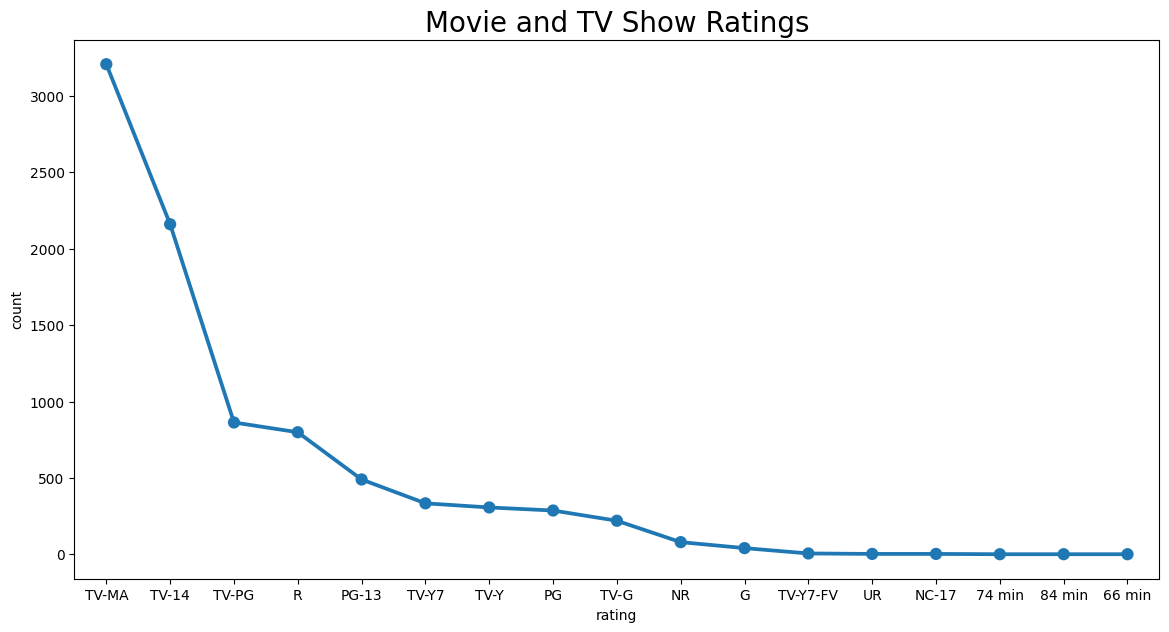

In [258]:
# Rating based on Movies and TV Shows

tv_ratings = df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Movie and TV Show Ratings',size='20')
plt.show()



<blockquote>Here displays a line chart of the ratings of both Movies and TV shows combine so we can see the overall picture of the ratings. </blockquote>

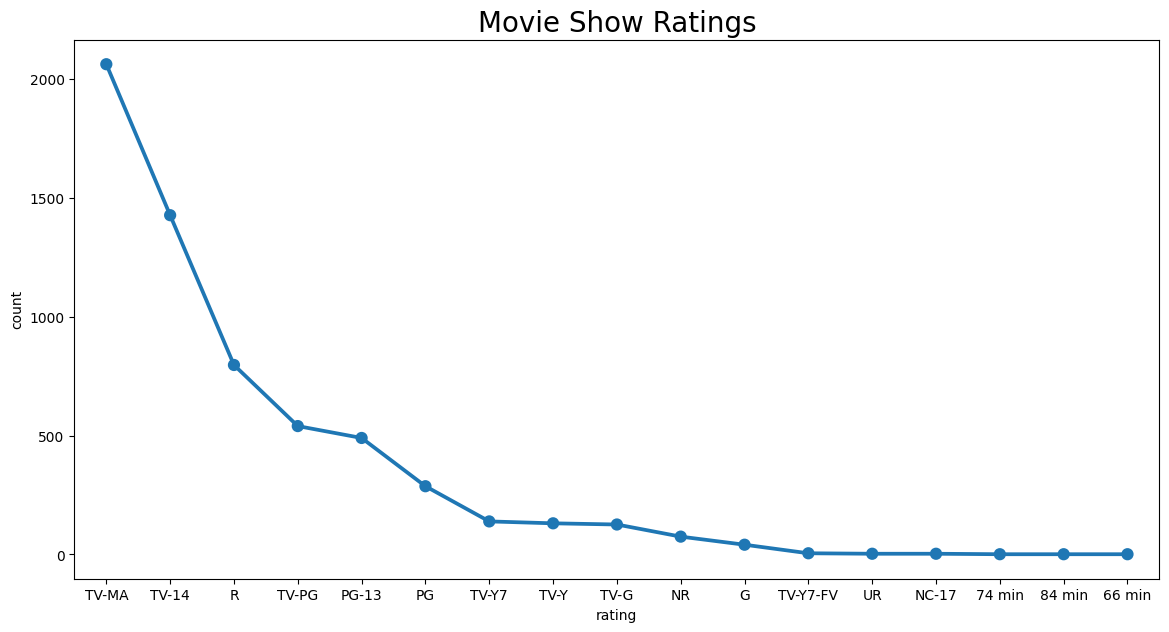

In [259]:
# Rating based on rating system of all Movies

movie_ratings = moviesType.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Movie Show Ratings',size='20')
plt.show()



# Now I filter it so we can the ratings for movies only

Now we find the TV Show rating  

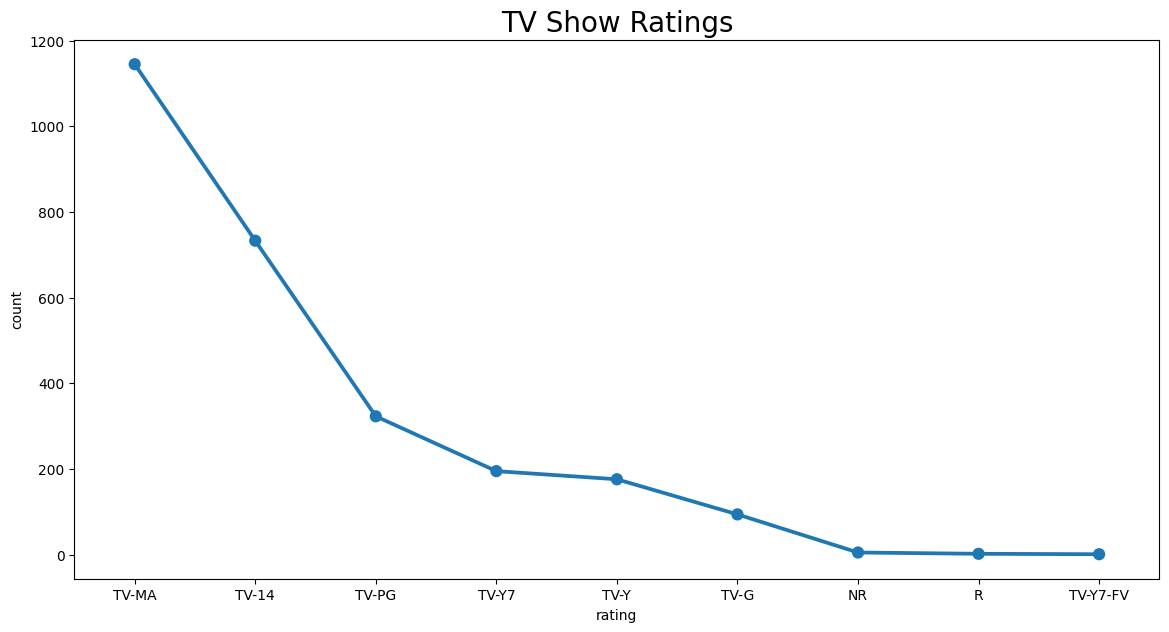

In [260]:
# Rating based on rating system of all TV Shows

tv_ratings = TVShow.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

# Here I do the same thing but with shows, So I filter by TV shows and graph it 
# as shown below.

<blockquote> Finally we can now determine which rating is the most common vs least common </blockquote>

<h1>4) Who are the top 15 directors</h1>
Every production needs a director so who would be better to direct our program than the top director on the platform.
In order to determine that lets pull the list of directors that have directed something on Netflix.

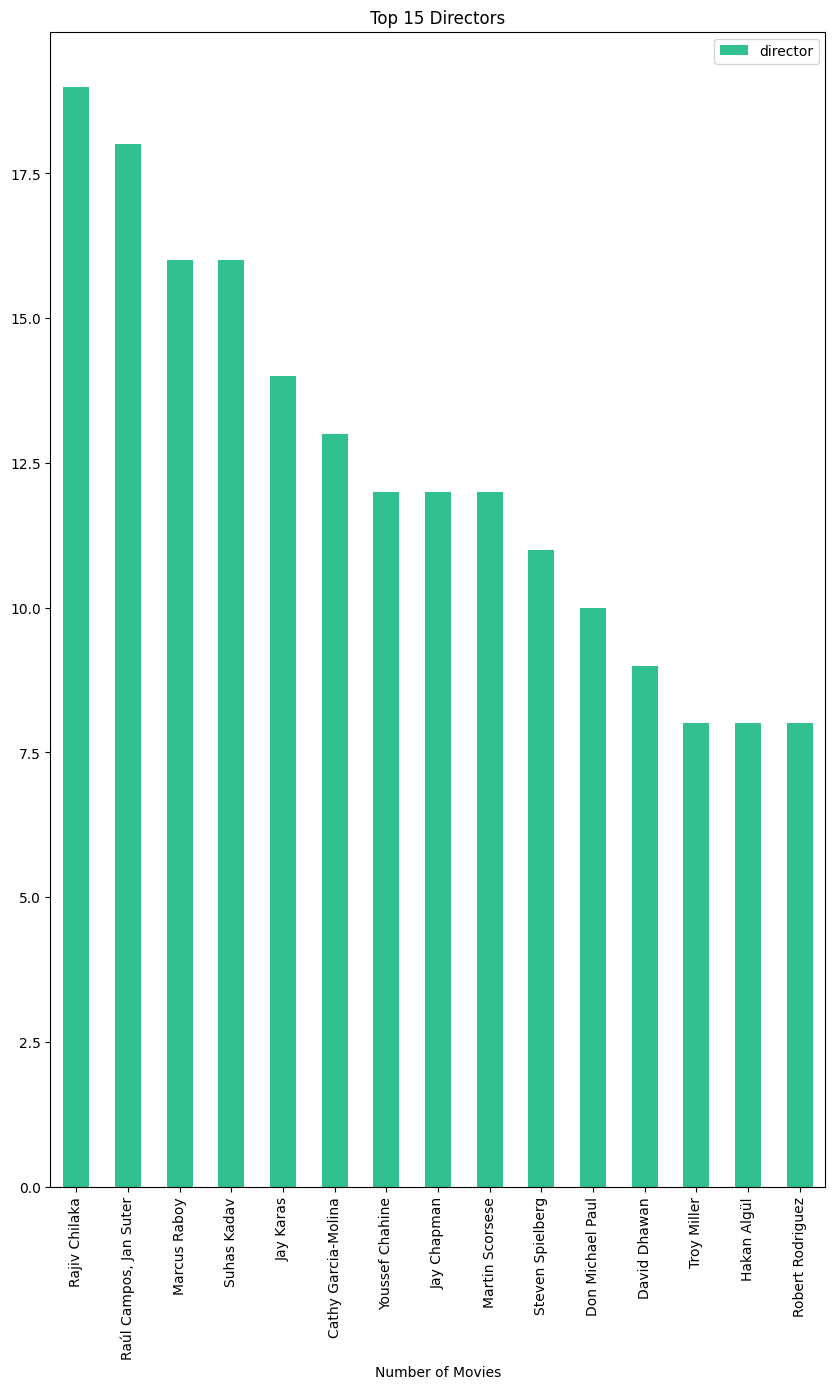

In [261]:
#Here I am setting up for the next chart of directors.

# Pulling Directors 
# Create a variable for the data frame to sit  in
netflix_directors = pd.DataFrame(df['director'].value_counts()).sort_values(by='director',ascending=False)[:15]

# Chart Type
# Select what kind of chart 
dt = netflix_directors.plot.bar(color = '#32bf8e', fontsize = 10)

# Set Title
dt.set(title = 'Top 15 Directors')

# X axis
dt.set_xlabel('Number of Movies', color = 'black', fontsize = '10')


# Chart Size
dt.figure.set_size_inches(10, 15)

#Plotting Chart 
plt.show()

# The output shows the top 15 directors that has a production on Netflix



After pulling the directors and assigning them to a variable, once we do that we can take the information and graph it (like the one above) and analyze it to determine who would be the best to direct our program. Rajiv Chilaka seems to have the most directed films so he definitely has experience that we can use.